# DIGIT RECOGNIZATION

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sn

In [2]:
# Loading dataset

(X_train, y_train) , (X_test, y_test) = mnist.load_data()


In [3]:
#printing the shapes of the vectors 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
print(X_train.dtype)
print(X_train[0])
print(y_train)

uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

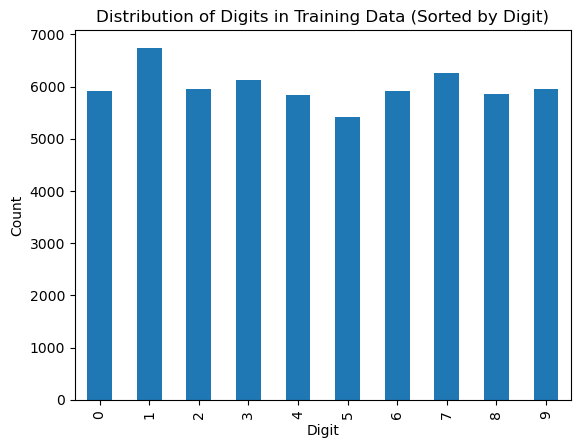

In [5]:
#number of data in each class
ds = pd.Series(y_train)
sorted_ds = ds.value_counts().sort_index()

# Plotting the bar graph
sorted_ds.plot(kind='bar')

plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Data (Sorted by Digit)')
plt.show()


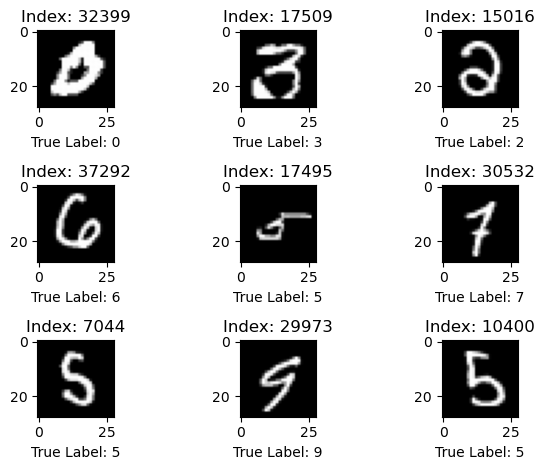

In [6]:
#Plotting the data of mnist 
random_indices = np.random.randint(0, len(X_train), 9)

plt.figure()
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)  
    plt.imshow(X_train[index], cmap="gray")
    plt.title(f"Index: {index}")
    plt.xlabel(f"True Label: {y_train[index]}")

plt.tight_layout()
plt.show()

In [7]:
# Flatten of images of mnist data set and normalize
x_train_flat = X_train.reshape(X_train.shape[0], -1)/ 255.0 
x_test_flat = X_test.reshape(X_test.shape[0], -1)/ 255.0 
print(x_train_flat.shape)
print(x_test_flat.shape)


(60000, 784)
(10000, 784)


In [8]:
# Training of Model By SVM Classifier
svm_classifier = SVC(kernel="rbf", random_state=6)
svm_classifier.fit(x_train_flat, y_train)

# Making prediction
y_test_pred = svm_classifier.predict(x_test_flat)

# accuracy of the test set
accuracy_val = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {accuracy_val}")

# Save the trained SVM model
joblib.dump(svm_classifier, "Saved Models/svm_model.joblib")

Validation Accuracy: 0.9792


['Saved Models/svm_model.joblib']

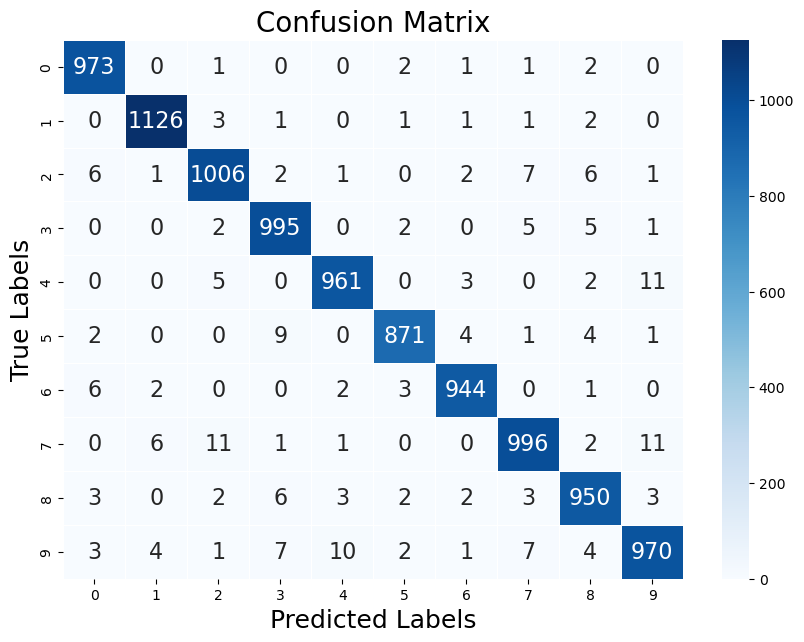

------------Classsification Report------------ 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [9]:
# Printing Confusion Matrix and Classification Report

cm=confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',  linewidths=.5, annot_kws={"size": 16})
           
plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('True Labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)
plt.show()
print("------------Classsification Report------------ \n")
print(classification_report(y_test, y_test_pred))


## Improving Accuracy 
## Building Model Using Neural Network


In [13]:
#installing the required library and function
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
#simple Neural Network with 1 layer

X_train = X_train.reshape(-1, 28, 28, 1)/ 255.0
X_test = X_test.reshape(-1, 28, 28, 1)/ 255.0

#Buliding the model
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#compiling the model 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


1500/1500 [==============================] - 5s 3ms/step - loss: 2.2099 - accuracy: 0.5674 - val_loss: 2.1179 - val_accuracy: 0.6687
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0383 - accuracy: 0.6793 - val_loss: 1.9514 - val_accuracy: 0.7124
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8829 - accuracy: 0.7171 - val_loss: 1.8006 - val_accuracy: 0.7448
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7425 - accuracy: 0.7386 - val_loss: 1.6640 - val_accuracy: 0.7652
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6159 - accuracy: 0.7567 - val_loss: 1.5413 - val_accuracy: 0.7797
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5025 - accuracy: 0.7689 - val_loss: 1.4316 - val_accuracy: 0.7921
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4014 - accuracy: 0.7813 - val_loss: 1.3338 - val_accurac

## Plotting the Training Accuracy & Loss, Validation Accuracy & Loss

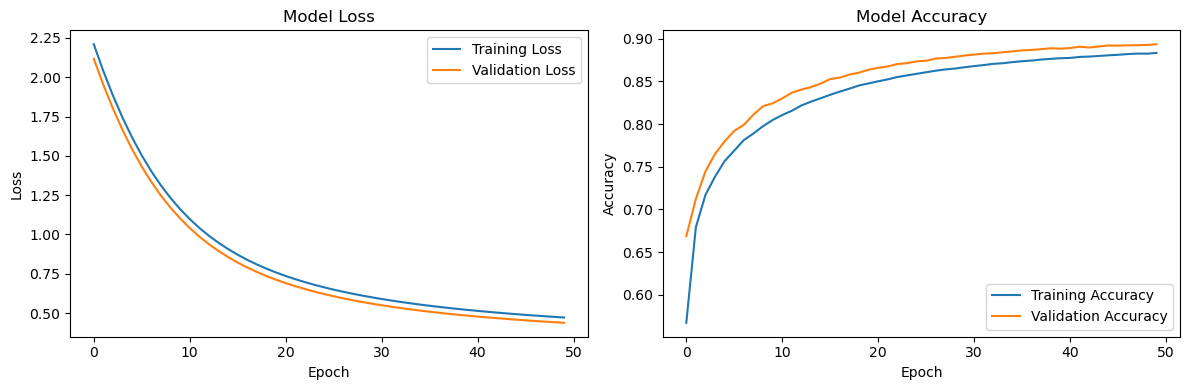

In [16]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Evaluation and testing of the test data

loss,accuracy=model.evaluate(X_test, y_test)
print(f"Testing Accuracy is: {accuracy*100}")
print(f"Loss is:{loss}")
y_predicted = model.predict(X_test)
print(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8941
Testing Accuracy is: 89.410001039505
Loss is:0.44611304998397827
313/313 [==============================] - 1s 2ms/step
[7.4052141e-04 7.6171455e-05 7.3854619e-04 4.4180509e-03 1.6289729e-03
 1.5970125e-03 5.0772192e-05 9.7466964e-01 6.5120158e-04 1.5429250e-02]
7


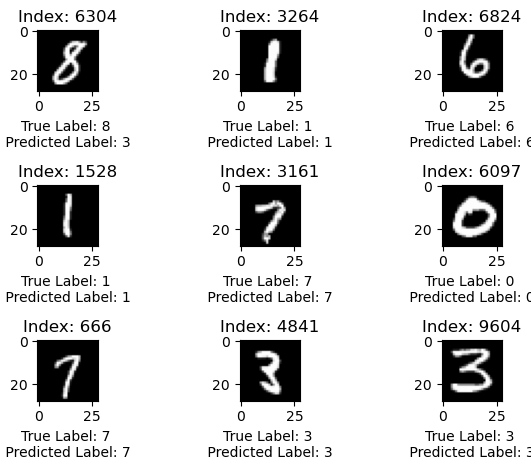

In [18]:
# plotting the predicted result using the model for 9 random index
random_indices = np.random.randint(0, len(X_test), 9)

plt.figure()
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"Index: {index}")
    plt.xlabel(f"True Label: {y_test[index]} \n Predicted Label: {y_predicted_labels[index]} ")
           
plt.tight_layout()
plt.show()

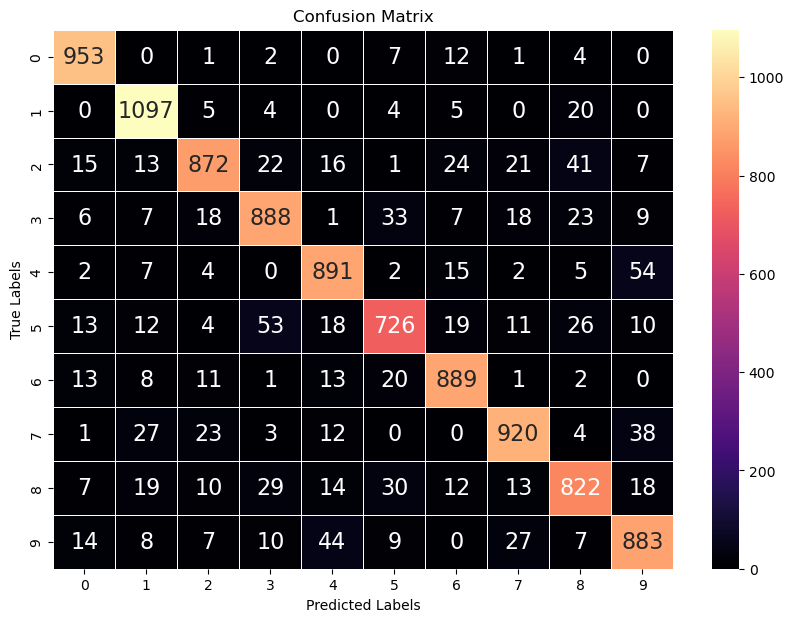

------------Classsification Report------------ 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
#confusion Matrix and Classificatiion Report
cm = confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,7))

sn.heatmap(cm, annot=True, fmt='d', cmap='magma',  linewidths=.5, annot_kws={"size": 16})

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("------------Classsification Report------------ \n")
print(classification_report(y_test, y_test_pred))

## Increasing the Hidden Layers to increase Accuracy


In [20]:
#using 3 hidden layers

#Buliding the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 


 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#compiling the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9410 - accuracy: 0.7064 - val_loss: 0.4824 - val_accuracy: 0.8623
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4309 - accuracy: 0.8755 - val_loss: 0.3565 - val_accuracy: 0.8979
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3564 - accuracy: 0.8971 - val_loss: 0.3190 - val_accuracy: 0.9081
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3158 - accuracy: 0.9077 - val_loss: 0.2866 - val_accuracy: 0.9188
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2815 - accuracy: 0.9183 - val_loss: 0.2580 - val_accuracy: 0.9272
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2539 - accuracy: 0.9250 - val_loss: 0.2340 - val_accuracy: 0.9325
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2288 - accuracy: 0.9319 - val_loss: 0.2169 - val_accuracy:

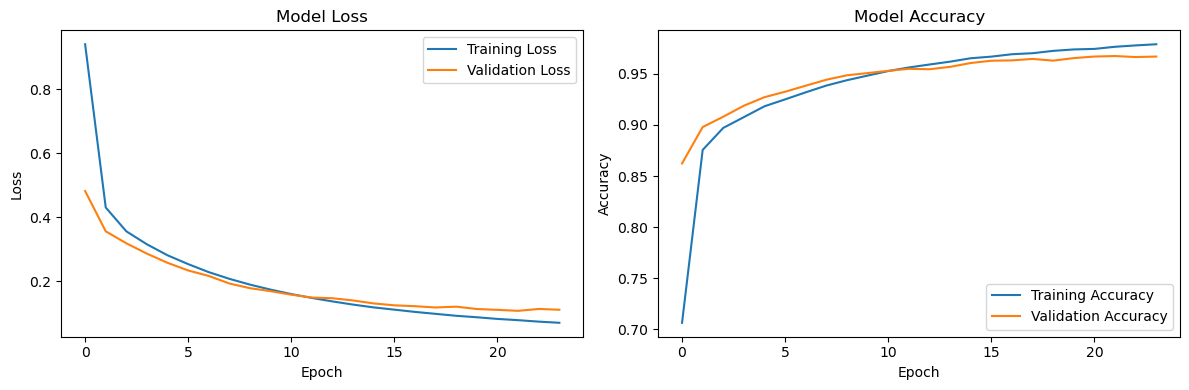

In [22]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Evaluation and testing of the test data

loss,accuracy=model.evaluate(X_test, y_test)
print(f"Testing Accuracy is: {accuracy*100}")
print(f"Loss is:{loss}")
y_predicted = model.predict(X_test)
print(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0])

# Save the trained ANN model
joblib.dump(svm_classifier, "Saved Models/ann_model.joblib")

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9686
Testing Accuracy is: 96.85999751091003
Loss is:0.10229731351137161
313/313 [==============================] - 1s 2ms/step
[2.0910779e-06 6.0819694e-08 2.8277340e-04 6.0566183e-04 8.9703495e-11
 9.0450767e-09 1.2265127e-14 9.9910057e-01 1.2498682e-06 7.6637771e-06]
7


['Saved Models/ann_model.joblib']

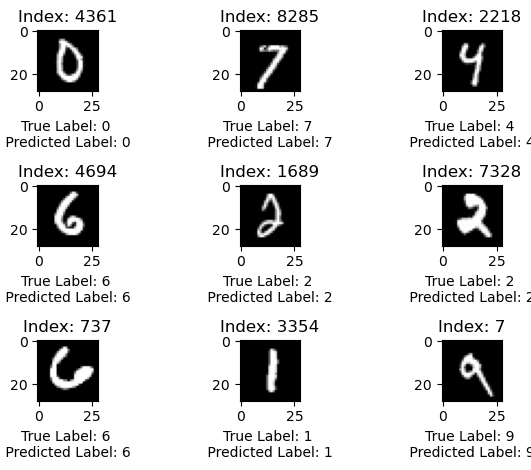

In [24]:
# plotting the predicted result using the model for 9 random index
random_indices = np.random.randint(0, len(X_test), 9)

# Create subplots
plt.figure()
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"Index: {index}")
    plt.xlabel(f"True Label: {y_test[index]} \n Predicted Label: {y_predicted_labels[index]} ")
           
plt.tight_layout()
plt.show()

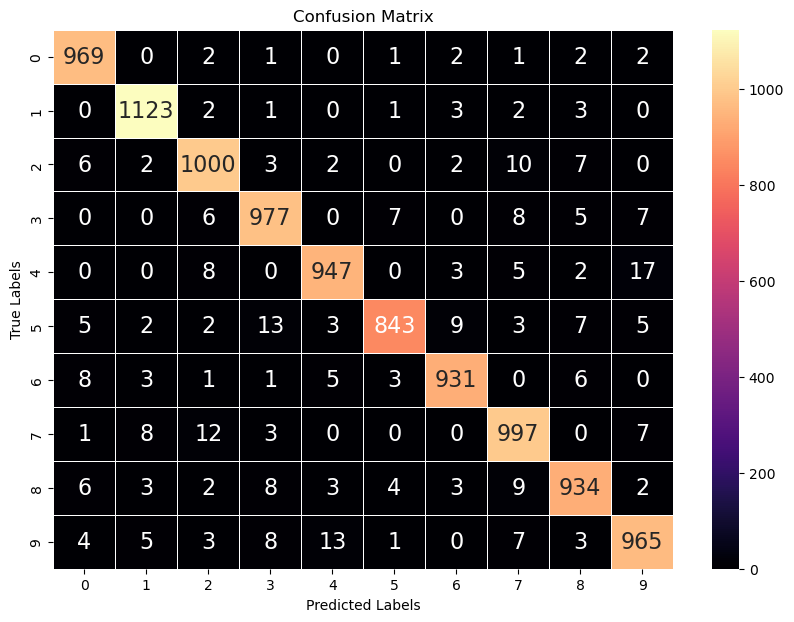

------------Classsification Report------------ 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [25]:
#confusion Matrix and Classificatiion Report
cm = confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,7))

# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=True, fmt='d', cmap='magma',  linewidths=.5, annot_kws={"size": 16})

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("------------Classsification Report------------ \n")
print(classification_report(y_test, y_predicted_labels))

##

## Building the model using CNN Network

In [26]:
# importing the library and the function
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import cv2

In [27]:
#using 1 layer CNN Neural Network 

(X_train, y_train) , (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)/ 255.0
X_test = X_test.reshape(-1, 28, 28, 1)/ 255.0


# Building the CNN model
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 flatten_3 (Flatten)         (None, 4225)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                270464    
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 271364 (1.04 MB)
Trainable params: 271364 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

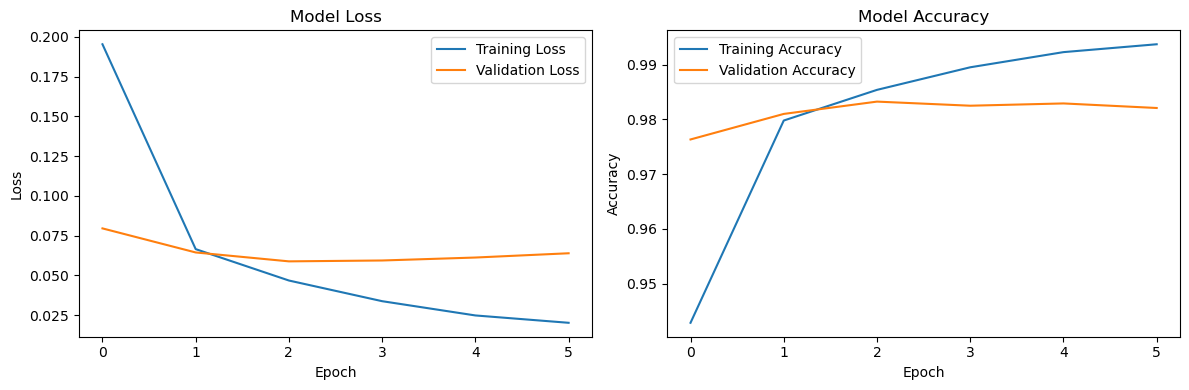

In [28]:
# plotting the graph between training loss and validation loss, training accuracy and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Evaluation and testing of the test data

loss,accuracy=model.evaluate(X_test, y_test)
print("\n")
print(f"Testing Accuracy is: {accuracy*100}")
print(f"Loss is:{loss}")
print("\n")

y_predicted = model.predict(X_test)
print(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0])



313/313 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9821


Testing Accuracy is: 98.21000099182129
Loss is:0.05339374393224716


313/313 [==============================] - 1s 2ms/step
[6.8197599e-09 1.2663788e-06 5.9273594e-07 2.5635384e-06 3.2417480e-09
 1.2171824e-09 2.3925957e-13 9.9999464e-01 3.7430405e-07 5.0293238e-07]
7


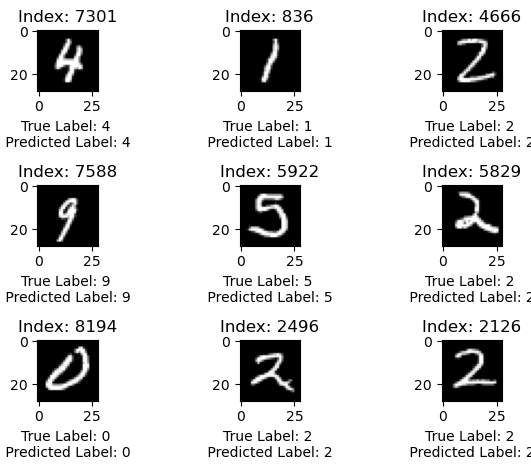

In [30]:
# plotting the predicted result using the model for 9 random index
random_indices = np.random.randint(0, len(X_test), 9)

# Create subplots
plt.figure()
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"Index: {index}")
    plt.xlabel(f"True Label: {y_test[index]} \n Predicted Label: {y_predicted_labels[index]} ")
           
plt.tight_layout()
plt.show()

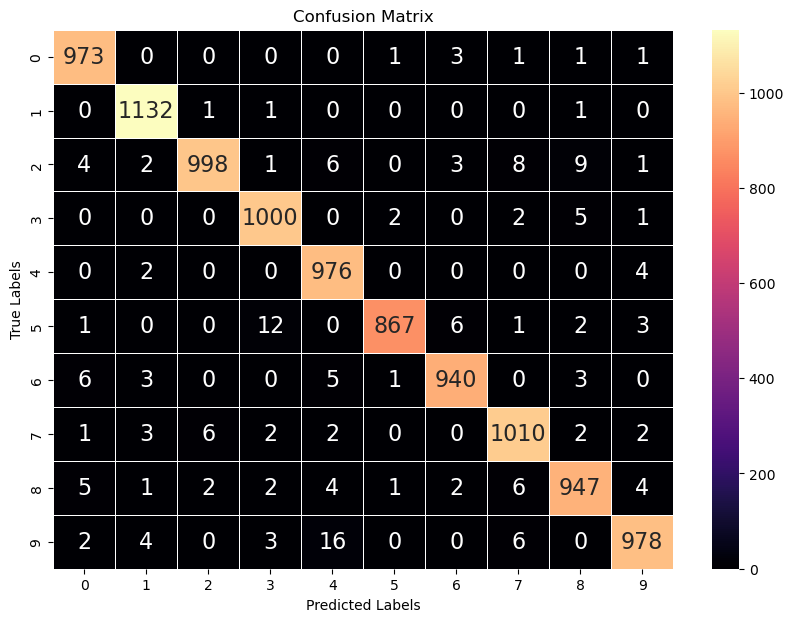

------------Classsification Report------------ 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [31]:
#confusion Matrix and Classificatiion Report
cm = confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,7))

# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=True, fmt='d', cmap='magma',  linewidths=.5, annot_kws={"size": 16})

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("------------Classsification Report------------ \n")
print(classification_report(y_test, y_predicted_labels))

## Final Model

In [32]:
#final model Using multi layer CNN

(X_train, y_train) , (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)/ 255.0
X_test = X_test.reshape(-1, 28, 28, 1)/ 255.0

#Building of Model
model = Sequential()
model.add(Conv2D(64,(3, 3), input_shape=(28, 28, 1),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 64)         

In [33]:
#compilation of model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=[early_stopping])


Epoch 1/50
1313/1313 [==============================] - 17s 12ms/step - loss: 0.2885 - accuracy: 0.9083 - val_loss: 0.1237 - val_accuracy: 0.9638
Epoch 2/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0964 - accuracy: 0.9709 - val_loss: 0.0847 - val_accuracy: 0.9749
Epoch 3/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0699 - accuracy: 0.9785 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 4/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0555 - accuracy: 0.9823 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 5/50
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0656 - val_accuracy: 0.9791
Epoch 6/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0668 - val_accuracy: 0.9814
Epoch 7/50
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0782 -

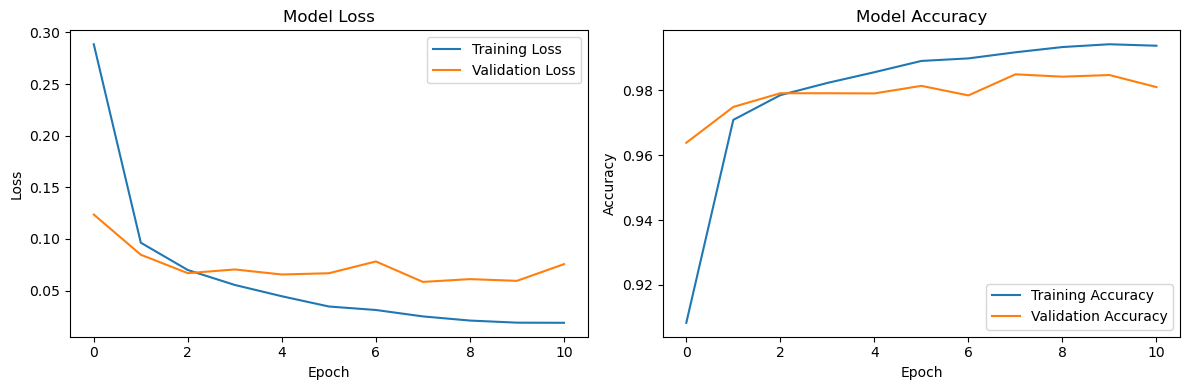

In [34]:
# plotting the graph between training loss and validation loss, training accuracy and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
# Evaluation and testing of the test data and saving the model

loss,accuracy=model.evaluate(X_test, y_test)
print("\n")
print(f"Testing Accuracy is: {accuracy*100}")
print(f"Loss is:{loss}")
print("\n")

y_predicted = model.predict(X_test)
print(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0])

#saving of model
joblib.dump(model, "Saved Models/cnn_model.joblib")

313/313 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9836


Testing Accuracy is: 98.36000204086304
Loss is:0.07043319940567017


313/313 [==============================] - 2s 5ms/step
[3.1218674e-09 4.2378655e-08 1.2175385e-06 3.4907219e-09 2.0705197e-10
 8.9846602e-12 1.4044792e-16 9.9999869e-01 1.3959275e-09 9.0575824e-08]
7


['Saved Models/cnn_model.joblib']

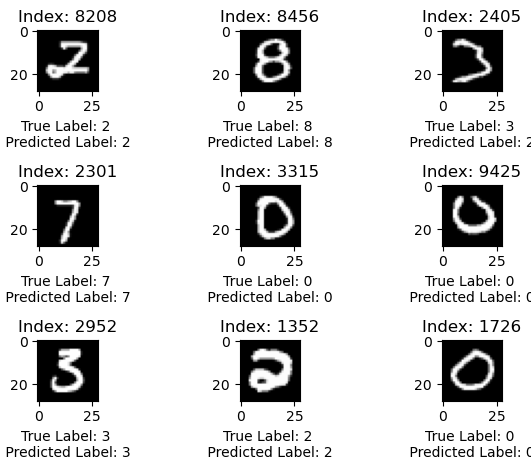

In [36]:
# plotting the predicted result using the model for 9 random index
random_indices = np.random.randint(0, len(X_test), 9)

# Create subplots
plt.figure()
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"Index: {index}")
    plt.xlabel(f"True Label: {y_test[index]} \n Predicted Label: {y_predicted_labels[index]} ")
           
plt.tight_layout()
plt.show()

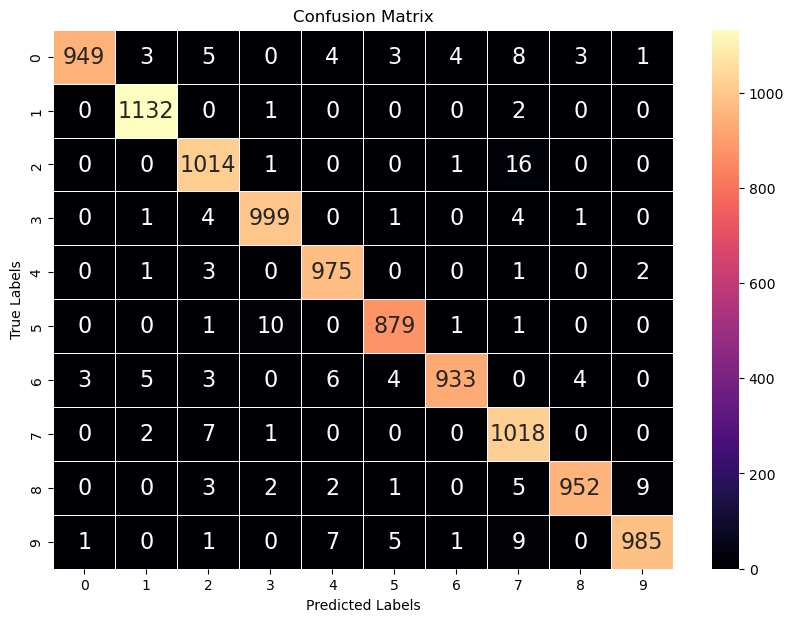

------------Classsification Report------------ 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.99      0.97      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [37]:
#confusion Matrix and Classificatiion Report
cm = confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,7))

# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=True, fmt='d', cmap='magma',  linewidths=.5, annot_kws={"size": 16})

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("------------Classsification Report------------ \n")
print(classification_report(y_test, y_predicted_labels))

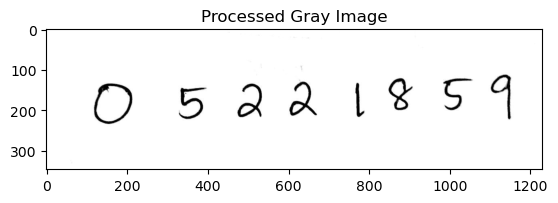

In [38]:
#load the model
model = joblib.load("Saved Models/cnn_model.joblib")
image=cv2.imread("live_testing Images/digits3.jpg")
grey=cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
plt.imshow(grey,cmap="gray")
plt.title("Processed Gray Image")
plt.show()




 Preprocessed image:


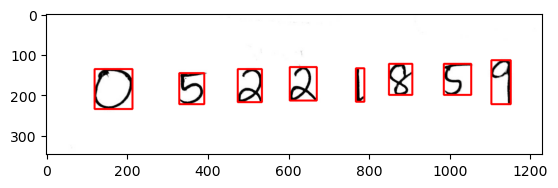

1/1 [==============================] - 0s 121ms/step


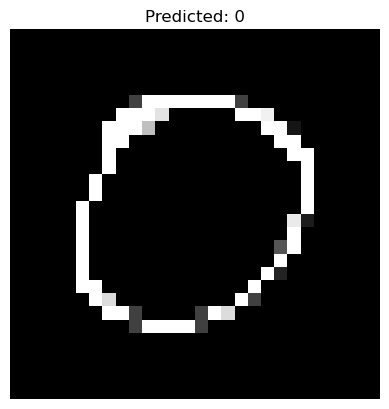

1/1 [==============================] - 0s 22ms/step


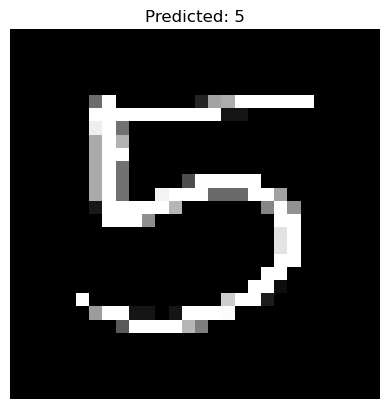

1/1 [==============================] - 0s 28ms/step


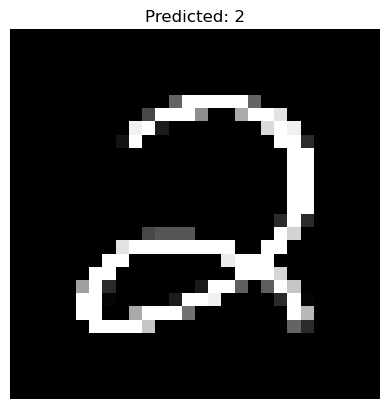

1/1 [==============================] - 0s 32ms/step


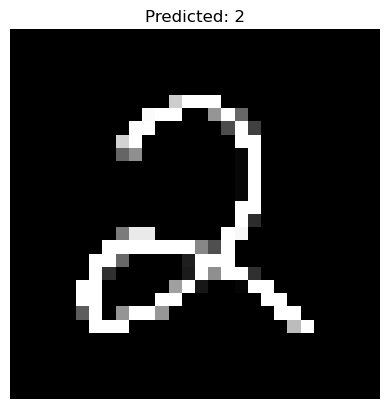

1/1 [==============================] - 0s 47ms/step


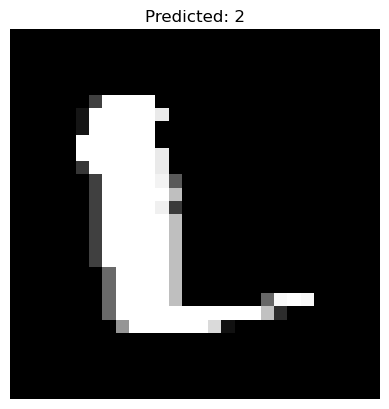

1/1 [==============================] - 0s 31ms/step


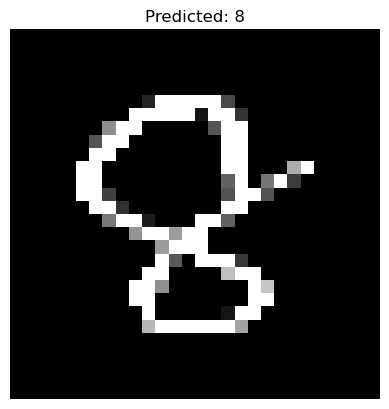

1/1 [==============================] - 0s 32ms/step


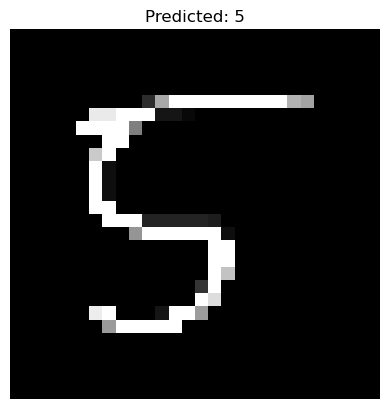

1/1 [==============================] - 0s 16ms/step


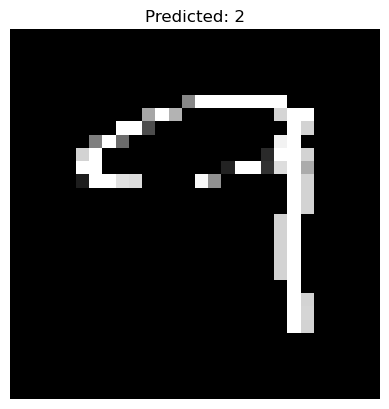

In [39]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sorting contours based on x-coordinate
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []

# Create a copy  for drawing rectangles
image_with_rectangles = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Filter out small and large contours
    if 10 < w < 200 and 10 < h < 200:
        # Creating a rectangle
        cv2.rectangle(image_with_rectangles, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=3)

        # Cropping digit
        digit = thresh[y:y+h, x:x+w]

        # Resizing 
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        # Adding  preprocessed digit
        preprocessed_digits.append(padded_digit)

print("\n\n\n Preprocessed image:")
plt.imshow(image_with_rectangles, cmap="gray")
plt.show()


for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

    # reshaping
    digit = digit.reshape(28, 28)

    plt.imshow(digit, cmap="gray")
    plt.title(f"Predicted: {np.argmax(prediction)}")
    plt.axis("off")
    plt.show()




## Thank You